In [1]:
%run "..\data_cleaning\data_preprocessing.ipynb"

In [2]:
df = fetch_and_merge()

In [3]:
left_df = fetch_data_csv('f1sim-ref-left.csv')
right_df = fetch_data_csv('f1sim-ref-right.csv')
left_df = left_df.drop_duplicates(subset=["WORLDPOSX","WORLDPOSY"])
right_df = right_df.drop_duplicates(subset=["WORLDPOSX","WORLDPOSY"])
left_df.drop(184, inplace=True)
left_df.drop(4157, inplace=True)
right_df.drop(24, inplace=True)

In [4]:
x1 = 50
x2 = 600
y1 = -250
y2 = 500
df = df[(df["WORLDPOSX"] > x1) & (df["WORLDPOSX"] < x2)]
df = df[(df["WORLDPOSY"] > y1) & (df["WORLDPOSY"] < y2)]
left_df = left_df[(left_df["WORLDPOSX"] > x1) & (left_df["WORLDPOSX"] < x2)]
left_df = left_df[(left_df["WORLDPOSY"] > y1) & (left_df["WORLDPOSY"] < y2)]
right_df = right_df[(right_df["WORLDPOSX"] > x1) & (right_df["WORLDPOSX"] < x2)]
right_df = right_df[(right_df["WORLDPOSY"] > y1) & (right_df["WORLDPOSY"] < y2)]

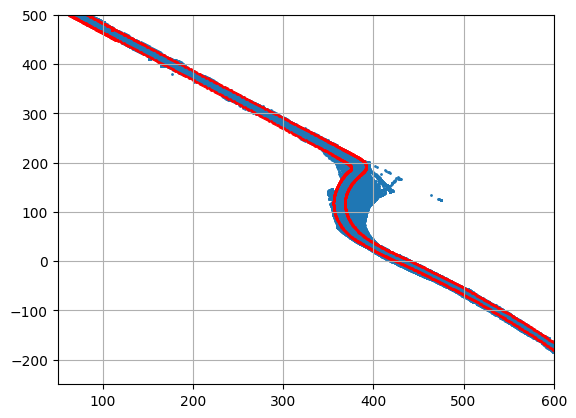

In [6]:
plt.scatter(df["WORLDPOSX"], df["WORLDPOSY"], s=1)
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')
plt.grid(True)
plt.xlim(50, 600)
plt.ylim(-250, 500)
plt.show()

# using this, we can find the areas where we want to examine
# x: [50,600]
# y:[-250, 500]
# this area encases the entirety of turns 1 and 2, including braking point and full acceleration

In [5]:
left_shortest = []
right_shortest = []
left_closest = []
right_closest = []
for row in df.iterrows():
    x=row[1][20]
    y=row[1][21]
    lowest_left = 100000
    lowest_right = 100000
    for l in left_df.iterrows():
        lx=l[1][3]
        ly=l[1][4]
        dist=np.sqrt((lx-x)**2+(ly-y)**2)
        if dist < lowest_left:
            lowest_left = dist
            closest_left = (lx, ly)
    for r in right_df.iterrows():
        rx=r[1][3]
        ry=r[1][4]
        dist=np.sqrt((rx-x)**2+(ry-y)**2)
        if dist < lowest_right:
            lowest_right = dist
            closest_right = (rx, ry)
    left_shortest.append(lowest_left)
    right_shortest.append(lowest_right)
    left_closest.append(closest_left)
    right_closest.append(closest_right)
df["left_shortest"] = left_shortest
df["right_shortest"] = right_shortest
df["left_closest"] = left_closest
df["right_closest"] = right_closest

In [7]:
df

,LAP_INDEX,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,...,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,left_shortest,right_shortest,left_closest,right_closest
0,1,1.003468e+19,1680,1,1,1.775714,16,30129,18569,87226.0,...,-23615.0,-138.0,-22714.0,22704.0,846.0,-23610.0,3.455802,10.174289,"(116.08881378173828, 467.1883850097656)","(105.4539566040039, 458.6979064941406)"
1,1,1.003468e+19,1681,1,1,5.864580,66,30129,18569,87226.0,...,-23685.0,-190.0,-22641.0,22630.0,850.0,-23681.0,3.365434,10.182519,"(118.38107299804688, 464.9837646484375)","(109.8089599609375, 454.4977111816406)"
2,1,1.003468e+19,1682,1,1,9.964501,116,30129,18569,87226.0,...,-23765.0,-195.0,-22557.0,22547.0,812.0,-23761.0,3.497007,10.153931,"(121.62169647216795, 462.06842041015625)","(112.1916275024414, 452.2031555175781)"
3,1,1.003468e+19,1683,1,1,14.072903,166,30129,18569,87226.0,...,-23824.0,-174.0,-22495.0,22485.0,809.0,-23820.0,3.361903,10.176946,"(124.0387954711914, 459.542724609375)","(114.97864532470705, 449.5224914550781)"
4,1,1.003468e+19,1684,1,1,18.184681,216,30129,18569,87226.0,...,-23838.0,-140.0,-22480.0,22471.0,820.0,-23833.0,3.361401,10.242086,"(127.84263610839844, 455.8820495605469)","(117.3753433227539, 447.2208557128906)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849920,1359,9.988606e+18,3258,2,1,836.135742,13271,32563,18983,91857.0,...,-20363.0,-49.0,-25670.0,25662.0,-855.0,-20355.0,7.333521,2.523359,"(595.0112915039062, -159.18409729003906)","(587.8803100585938, -165.7380828857422)"
1849921,1359,9.988606e+18,3259,2,1,840.134277,13321,32563,18983,91857.0,...,-20459.0,-93.0,-25594.0,25587.0,-837.0,-20450.0,7.352190,2.344569,"(597.0923461914062, -161.74734497070312)","(589.7338256835938, -168.0529022216797)"
1849922,1359,9.988606e+18,3260,2,1,844.142578,13371,32563,18983,91857.0,...,-20511.0,-58.0,-25552.0,25544.0,-891.0,-20503.0,7.431272,2.393826,"(599.1694946289062, -164.32089233398438)","(592.5140991210938, -171.54800415039062)"
1849923,1359,9.988606e+18,3261,2,1,848.166992,13421,32563,18983,91857.0,...,-20431.0,-87.0,-25616.0,25608.0,-898.0,-20422.0,8.947764,2.388831,"(599.1694946289062, -164.32089233398438)","(594.6680908203125, -174.28103637695312)"


In [6]:
df.to_csv('new_df.csv')